# Agent with Explicit Model Instance

This notebook demonstrates how to create a LangChain agent with full control over model configuration by creating an explicit ChatOllama instance.

## Key Concepts
- **Explicit Model Creation**: Create ChatOllama instance with custom parameters
- **Parameter Control**: Configure temperature, token limits, timeouts
- **Production Ready**: Better for production environments

## Model Parameters Explained
- **temperature**: Controls randomness (0.0 = deterministic, 1.0 = very creative)
- **num_predict**: Maximum tokens to generate (similar to max_tokens in OpenAI)
- etc.

In [7]:
# Import required modules
from langchain_ollama import ChatOllama
from langchain.agents import create_agent
import tools

In [ ]:
# result = "3*4+2-10/20"
# expression = "pow(2, 3) + sqrt(16) - log(100)"

In [8]:
tools.calculate.invoke("3*4+2-10/20")

'3*4+2-10/20 = 13.5'

## Creating Model Instance with Custom Parameters

Here we create a ChatOllama instance with specific configuration for mathematical calculations:

In [9]:
# Create model instance with custom parameters
model = ChatOllama(
    model="qwen3",
    base_url="http://localhost:11434",
    temperature=0,      # Low temperature for consistent math results
)

## Creating the Agent

Now we create the agent using our custom model instance:

In [10]:
# Create agent with explicit model instance
agent = create_agent(model, tools=[tools.calculate])

print("Agent created with explicit model instance!")
print("Full control over temperature, token limits, and other parameters")

Agent created with explicit model instance!
Full control over temperature, token limits, and other parameters


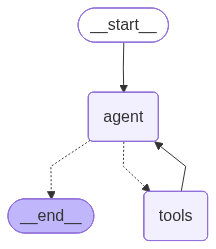

In [11]:
agent

## Testing the Agent

Let's test the agent with a mathematical calculation:

In [12]:
# Test the agent with a mathematical calculation
result = agent.invoke({
    "messages": "What's 15 * 27 + 100?"
})

print(f"Response: {result['messages'][-1].content}")

Response: <think>
Okay, let me check the user's question again. They asked, "What's 15 * 27 + 100?" So first, I need to calculate 15 multiplied by 27. Let me do that step by step. 15 times 20 is 300, and 15 times 7 is 105. Adding those together gives 300 + 105 = 405. Then, adding 100 to that result: 405 + 100 = 505. Wait, but maybe I should verify using another method. Let's break down 27 into 25 + 2. 15*25 is 375, and 15*2 is 30. Adding those gives 375 + 30 = 405. Then adding 100 still gives 505. Both methods lead to the same answer. I'll use the calculate function to confirm the result once more. The expression "15 * 27 + 100" should evaluate to 505. Alright, that's consistent. The final answer is 505.
</think>

The result of the calculation is 505.


In [13]:
result

{'messages': [HumanMessage(content="What's 15 * 27 + 100?", additional_kwargs={}, response_metadata={}, id='5c84ec63-fe6b-4ab3-ad38-7ba2e5832cec'),
  AIMessage(content='<think>\nOkay, let\'s see. The user is asking "What\'s 15 * 27 + 100?" I need to calculate that. First, I should handle the multiplication part. 15 multiplied by 27. Let me do that step by step. 15 times 20 is 300, and 15 times 7 is 105. Adding those together gives 300 + 105 = 405. Then, add 100 to that result. So 405 + 100 equals 505. Wait, but maybe I should double-check using another method. Alternatively, 27 can be broken into 25 + 2. 15*25 is 375, and 15*2 is 30. Adding those gives 375 + 30 = 405. Then adding 100 still gives 505. Yeah, that seems right. I should use the calculate function to ensure accuracy, though. Let me input the expression "15 * 27 + 100" into the function and return the result.\n</think>\n\n', additional_kwargs={}, response_metadata={'model': 'qwen3', 'created_at': '2025-09-30T06:33:35.9737799

In [15]:
result['messages'][-1].pretty_print()

================================== Ai Message ==================================

<think>
Okay, let me check the user's question again. They asked, "What's 15 * 27 + 100?" So first, I need to calculate 15 multiplied by 27. Let me do that step by step. 15 times 20 is 300, and 15 times 7 is 105. Adding those together gives 300 + 105 = 405. Then, adding 100 to that result: 405 + 100 = 505. Wait, but maybe I should verify using another method. Let's break down 27 into 25 + 2. 15*25 is 375, and 15*2 is 30. Adding those gives 375 + 30 = 405. Then adding 100 still gives 505. Both methods lead to the same answer. I'll use the calculate function to confirm the result once more. The expression "15 * 27 + 100" should evaluate to 505. Alright, that's consistent. The final answer is 505.
</think>

The result of the calculation is 505.


## Experimenting with Different Settings



In [16]:

question = "Explain what 2 + 2 equals and show your reasoning"

# Configuration 1: Conservative/Deterministic - for consistent, reliable outputs
print("=== Configuration 1: Conservative/Deterministic ===")
llm1 = ChatOllama(
    model="qwen3",
    temperature=0,           # Low randomness for consistency
    top_p=1,                # Focus on most probable tokens
    repeat_penalty=1.1,       # Slight repetition penalty
    num_predict=500,          # Reasonable output length
    num_ctx=4096,            # Standard context window
    seed=42                   # Reproducible results
)
agent = create_agent(llm1, tools=[tools.calculate])
result = agent.invoke({"messages": question})
print(f"Conservative output: {result['messages'][-1].content}")
print()

=== Configuration 1: Conservative/Deterministic ===
Conservative output: <think>
Okay, the user is asking what 2 + 2 equals and wants me to show my reasoning. Let me start by recalling basic arithmetic. Addition is one of the fundamental operations. When you add 2 and 2, you're combining two groups of one item each. Wait, no, actually, each number represents a quantity. So 2 is two units, adding another two units would total four. Let me verify that. If I have two apples and add two more, I have four apples. That seems right. But maybe I should check using a different method. Let's count: 1, 2 (that's the first 2), then 3, 4 (adding the second 2). Yep, that's four. Alternatively, using a number line: starting at 2 and moving 2 steps forward lands me at 4. All these methods confirm the result is 4. I should also mention that this is a basic arithmetic fact, so there's no need for complex calculations here. The answer should be straightforward.
</think>

2 + 2 equals 4. 

**Reasoning:** 

In [23]:
print("=== Configuration 2: Balanced/Production ===")
llm = ChatOllama(
    model="qwen3",
    temperature=2,          # Moderate creativity
    top_k=2000,                # Standard token selection
    repeat_penalty=1.15,     # Moderate repetition control
    repeat_last_n=64,        # Check last 64 tokens for repetition
    num_predict=1000,         # Short responses allowed | check output 
    num_ctx=8192,           # Larger context for complex tasks
    keep_alive="5m",         # Keep model loaded for performance
    num_thread=4             # Optimize for multi-core processing
)

agent = create_agent(llm, tools=[tools.calculate])
result = agent.invoke({"messages": question})
print(result['messages'][-1].content)
print()


=== Configuration 2: Balanced/Production ===
<think>
Okay, the user is asking what 2 + 2 equals and wants me to show my reasoning. Let me start by breaking down the problem. The expression is 2 + 2. Addition is the basic arithmetic operation here. I know that when you add two numbers, you combine their values. So 2 is the same as two units, and adding another two units would total four. Wait, but maybe I should verify that. Let me think again. If I have two apples and add two more, I have four apples. That's straightforward. But maybe the user wants a more detailed explanation. Alternatively, could there be a trick here? The question seems simple, but maybe they're testing if I understand basic arithmetic. I should also check if there's any context where 2 + 2 might not equal 4, like in different number bases or modulo arithmetic. However, the question doesn't mention anything like that, so the default is base 10. So, the answer is 4. I should present the reasoning step by step to make

In [29]:
print("=== Configuration 2: Balanced/Production ===")
llm = ChatOllama(
    model="qwen3",
    temperature=2,          # Moderate creativity
    top_k=2000,                # Standard token selection
    repeat_penalty=1.15,     # Moderate repetition control
    repeat_last_n=64,        # Check last 64 tokens for repetition
    num_predict=1000,         # Short responses allowed | check output 
    num_ctx=8192,           # Larger context for complex tasks
    keep_alive="5m",         # Keep model loaded for performance
    num_thread=4,             # Optimize for multi-core processing
    reasoning=True
)

agent = create_agent(llm, tools=[tools.calculate])
result = agent.invoke({"messages": question})
print('question:', question)
print(result['messages'][-1].content)
print()

=== Configuration 2: Balanced/Production ===
question: Explain what 2 + 2 equals and show your reasoning
The calculation $2 + 2 = 4$ is correct! 🥳 If you have any more math problems or need further explanations, feel free to ask. 😊

